In [2]:
import datetime as dt
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from arch import arch_model
from arch.univariate import ZeroMean , ConstantMean ,  ARX , HARX
from arch.univariate import ARCH, GARCH
from arch.univariate import StudentsT , SkewStudent
import arch.data.sp500

# Import Data

In [3]:
data = arch.data.sp500.load()
market = data['Adj Close']
returns = 100 * market.pct_change().dropna()

# Build and Fit Model

In [4]:
# Build Mean Model, AR
am = ARX(y = returns,  lags = np.arange(1,2) , rescale=False)

### Build Volatility Model, GJR 
am.volatility = GARCH(p=1, o=1, q=1)

# Build Residual Model - Skewed T Distribution
am.distribution = SkewStudent()

# Fit Model
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     61,   Neg. LLF: 6731.12500127609
Iteration:     10,   Func. Count:    117,   Neg. LLF: 6718.5834150684805
Iteration:     15,   Func. Count:    170,   Neg. LLF: 6714.459410743196
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6714.459064561373
            Iterations: 16
            Function evaluations: 182
            Gradient evaluations: 16


# Perform Simulations

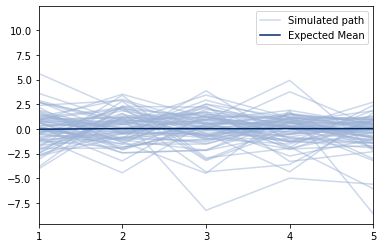

In [7]:
forecasts = res.forecast(horizon=10, method='simulation' , simulations = 69)
sims = forecasts.simulations

# For simulation object, 
# values             Simulated values of the process
# residuals          Simulated residuals used to produce the values
# variances          Simulated variances of the values
# residual_variances Simulated variance of the residuals

x = np.arange(1, 11)
lines = plt.plot(x, sims.values[-1].T, color='#9cb2d6', alpha=0.5)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.mean.iloc[-1].values, color='#002868')
line[0].set_label('Expected Mean')
plt.gca().set_xticks(x)
plt.gca().set_xlim(1,5)
legend = plt.legend()
